# Checking correlation between peer factors and covariates…

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

def correl(X, Y):
    """Computes the Pearson correlation coefficient and a 95% confidence
    interval based on the data in X and Y."""
    r = np.corrcoef(X, Y)[0,1]
    f = 0.5*np.log((1+r)/(1-r))
    se = 1/np.sqrt(len(X)-3)
    ucl = f + 2*se
    lcl = f - 2*se
    #
    lcl = (np.exp(2*lcl) - 1) / (np.exp(2*lcl) + 1)
    ucl = (np.exp(2*ucl) - 1) / (np.exp(2*ucl) + 1)
    return r,lcl,ucl

#Get IDs
#Get peerfactors #V1 V2 V3 V4 ... V17
peerfactors = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/Adipose-Subcutaneous/peerFactors.tsv',sep='\t')
idx = sorted([x.replace('.','-') for x in list(peerfactors.index)])

#Get covariates & Other phenotypes
    #PCAs
pcas = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/gtex.pca', sep=' ',header=None)
pca_cov = pcas.sort(columns=0, axis=0, ascending=True)
pca_cov = pca_cov.loc[pca_cov[0].isin(idx)]
    #AGE - RACE - ETHNICITY
phenos=pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/phen_attributes', sep='\t')
pheno=phenos.loc[phenos['SUBJID'].isin(idx)]
pheno = pheno.sort(columns='SUBJID', axis=0, ascending=True)
print (len(idx))
#print (peerfactors)
print (len(pheno))
print (len(pca_cov))
#print (pheno)    #SUBJID GENDER    AGE  RACE  ETHNCTY
                 #        Donor   (OPO)

101
101
101


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


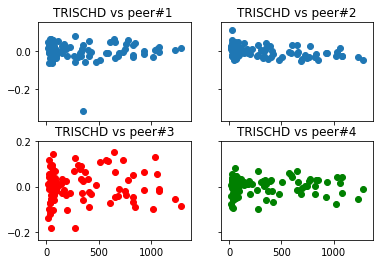

(-0.014616242507340215, 0.88465500858232982)
(-0.30497380969867394, 0.0019285110811234096)
(-0.0070358816483982378, 0.94432861368293086)
(0.097600237955829242, 0.33155738773492061)
(0.036457928730359093, 0.71738388948539478)
(0.028098159764668708, 0.78030377783381388)
(0.020427244394513093, 0.83932489879615257)
(-0.19952817566466699, 0.045453126943175812)
(0.071518804650461038, 0.47725814011483136)
(0.040192105533474479, 0.68984958399782559)
(0.22350738531536196, 0.024655014747859236)
(0.12188063070031011, 0.22468238273441113)


(-0.29059209063450236, 0.0031988165649976807)

In [2]:
#Plot for ischemic time
    #Get Ischemic time from phonotype table
Phenotypes='/storage/resources/datasets/gtex/53844/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002742.v6.p1.c1.GTEx_Subject_Phenotypes.GRU.txt.gz'
#Phenotypes='/storage/resources/datasets/gtex/53844/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002743.v6.p1.c1.GTEx_Sample_Attributes.GRU.txt.gz'

IT=pd.read_csv(Phenotypes, compression='gzip', sep='\t', quotechar='"', skiprows=10)
ind=['SUBJID','AGE','TRISCHD','RACE','GENDER', 'DTHHRDY', 'SMTSISCH']
Ischtime = IT.loc[:,ind]
Isctime=Ischtime.loc[Ischtime['SUBJID'].isin(idx)]
    #Plot it
X= Isctime['TRISCHD']
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(X, peerfactors['V2'])
ax1.set_title('TRISCHD vs peer#1 ') 
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('TRISCHD vs peer#2')
ax3.scatter(X, peerfactors['V6'] , color='r')
ax3.set_title('TRISCHD vs peer#3')
ax4.scatter(X, peerfactors['V7'], color='g')
ax4.set_title('TRISCHD vs peer#4')
plt.show()
print ( ss.pearsonr(peerfactors['V2'].values,X.values))
print ( ss.pearsonr(peerfactors['V3'].values,X.values))
print ( ss.pearsonr(peerfactors['V4'].values,X.values))
print ( ss.pearsonr(peerfactors['V5'].values,X.values))
print ( ss.pearsonr(peerfactors['V6'].values,X.values))
print ( ss.pearsonr(peerfactors['V7'].values,X.values))
print ( ss.pearsonr(peerfactors['V8'].values,X.values))
print ( ss.pearsonr(peerfactors['V9'].values,X.values))
print ( ss.pearsonr(peerfactors['V10'].values,X.values))
print ( ss.pearsonr(peerfactors['V11'].values,X.values))
print ( ss.pearsonr(peerfactors['V12'].values,X.values))
print ( ss.pearsonr(peerfactors['V13'].values,X.values))
#The results from this just show that the standard deviation is close to none
ss.pearsonr(peerfactors['V14'].values,X.values)

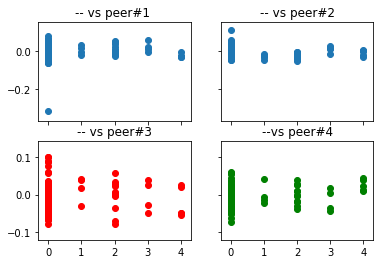

SpearmanrResult(correlation=-0.021298670003944115, pvalue=0.83256842725656899)
SpearmanrResult(correlation=-0.11625554467013995, pvalue=0.24696956624123761)
SpearmanrResult(correlation=-0.074841058464321972, pvalue=0.45698220470780926)
SpearmanrResult(correlation=0.082427386244266404, pvalue=0.41251854350949491)
SpearmanrResult(correlation=0.083172146045569897, pvalue=0.40829405723336543)
SpearmanrResult(correlation=0.04512368207897656, pvalue=0.65410191655678618)
SpearmanrResult(correlation=0.12828852655786704, pvalue=0.20106405996235238)
SpearmanrResult(correlation=0.019933277034887707, pvalue=0.84316002089447351)
SpearmanrResult(correlation=-0.0093606084830498322, pvalue=0.92597981058197287)
SpearmanrResult(correlation=-0.045350030646039395, pvalue=0.65247901882940018)
SpearmanrResult(correlation=0.11447396240035511, pvalue=0.25433595228030514)
SpearmanrResult(correlation=0.10248478991270471, pvalue=0.30781031817571486)


-0.089166732289395118

In [3]:
X=Isctime['DTHHRDY']
#print (len(X), ' ' , X)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(X, peerfactors['V2'])
ax1.set_title('-- vs peer#1 ')
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('-- vs peer#2')
ax3.scatter(X, peerfactors['V4'] , color='r')
ax3.set_title('-- vs peer#3')
ax4.scatter(X, peerfactors['V5'], color='g')
ax4.set_title('--vs peer#4')
plt.show()

'''These are the ANOVA assumption that I ignored ... Anyway it yield all nan as with pearson:
The samples are independent.
Each sample is from a normally distributed population.
The population standard deviations of the groups are all equal. This property is known as homoscedasticity.'''

print ( ss.spearmanr(peerfactors['V2'].values,X.values))    
print ( ss.spearmanr(peerfactors['V3'].values,X.values))
print ( ss.spearmanr(peerfactors['V4'].values,X.values))
print ( ss.spearmanr(peerfactors['V5'].values,X.values))
print ( ss.spearmanr(peerfactors['V6'].values,X.values))
print ( ss.spearmanr(peerfactors['V7'].values,X.values))
print ( ss.spearmanr(peerfactors['V8'].values,X.values))
print ( ss.spearmanr(peerfactors['V9'].values,X.values))
print ( ss.spearmanr(peerfactors['V10'].values,X.values))
print ( ss.spearmanr(peerfactors['V11'].values,X.values))
print ( ss.spearmanr(peerfactors['V12'].values,X.values))
print ( ss.spearmanr(peerfactors['V13'].values,X.values))
#The results from this just show that the standard deviation is close to none
ss.spearmanr(peerfactors['V14'].values,X.values).correlation

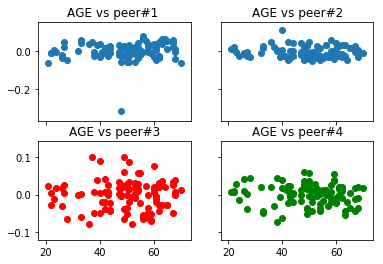

(0.10658978277849519, 0.28873255591511121)
(-0.058449615378750298, 0.56151249781529289)
(-0.004799477115084801, 0.96200790945534131)
(-0.083078427864102689, 0.40882425306049996)
(-0.030960593516882622, 0.75857634789875061)
(0.068043916259369369, 0.49897382593176465)
(-0.0020727800718847956, 0.98358714872903252)
(-0.081654590145675582, 0.4169289144852355)
(0.087693850175901727, 0.38319532427513758)
(-0.053274030457523075, 0.5967297625530027)
(-0.061868344057387281, 0.53880633940965783)
(0.074796736514036205, 0.45724952942442365)


(-0.043976422870196707, 0.66235231003748241)

In [4]:
#Plot for AGE
X=Isctime['AGE']

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(X, peerfactors['V2'])
ax1.set_title('AGE vs peer#1 ')
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('AGE vs peer#2')
ax3.scatter(X, peerfactors['V4'] , color='r')
ax3.set_title('AGE vs peer#3')
ax4.scatter(X, peerfactors['V5'], color='g')
ax4.set_title('AGE vs peer#4')
plt.show()
print ( ss.pearsonr(peerfactors['V2'].values,X.values))
print ( ss.pearsonr(peerfactors['V3'].values,X.values))
print ( ss.pearsonr(peerfactors['V4'].values,X.values))
print ( ss.pearsonr(peerfactors['V5'].values,X.values))
print ( ss.pearsonr(peerfactors['V6'].values,X.values))
print ( ss.pearsonr(peerfactors['V7'].values,X.values))
print ( ss.pearsonr(peerfactors['V8'].values,X.values))
print ( ss.pearsonr(peerfactors['V9'].values,X.values))
print ( ss.pearsonr(peerfactors['V10'].values,X.values))
print ( ss.pearsonr(peerfactors['V11'].values,X.values))
print ( ss.pearsonr(peerfactors['V12'].values,X.values))
print ( ss.pearsonr(peerfactors['V13'].values,X.values))
#The results from this just show that the standard deviation is close to none
ss.pearsonr(peerfactors['V14'].values,X.values)

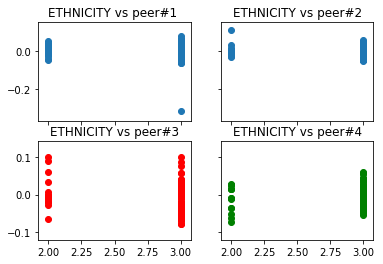

F_onewayResult(statistic=6741.840949681934, pvalue=5.160599891837496e-156)
F_onewayResult(statistic=6835.0000494234164, pvalue=1.3604142901524891e-156)
F_onewayResult(statistic=6777.237419914386, pvalue=3.1030131065707484e-156)
F_onewayResult(statistic=6812.0316271812017, pvalue=1.8867555747396247e-156)
F_onewayResult(statistic=6593.177954844652, pvalue=4.4978659761446333e-155)
F_onewayResult(statistic=6780.4847836733888, pvalue=2.9619131255145793e-156)
F_onewayResult(statistic=6764.2972652756289, pvalue=3.7360741957361084e-156)
F_onewayResult(statistic=6779.482960967086, pvalue=3.0047376964466004e-156)
F_onewayResult(statistic=6741.7974523180237, pvalue=5.1638350064924974e-156)
F_onewayResult(statistic=6723.0263273640257, pvalue=6.7699443172015659e-156)
F_onewayResult(statistic=6764.2587253814045, pvalue=3.7381425915429819e-156)
F_onewayResult(statistic=6825.9525640402908, pvalue=1.5472783016652972e-156)
F_onewayResult(statistic=6824.3246625609117, pvalue=1.5835566021634267e-156)
F_on

In [7]:
#Plot for RAce
X=Isctime['RACE']
#print (X)
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(X, peerfactors['V2'])
ax1.set_title('ETHNICITY vs peer#1 ')
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('ETHNICITY vs peer#2')
ax3.scatter(X, peerfactors['V4'] , color='r')
ax3.set_title('ETHNICITY vs peer#3')
ax4.scatter(X, peerfactors['V5'], color='g')
ax4.set_title('ETHNICITY vs peer#4')
plt.show()
print(ss.f_oneway(peerfactors['V2'].values,X.values))      #RACE categorical
print(ss.f_oneway(peerfactors['V3'].values,X.values))      #Using ANOVA
print(ss.f_oneway(peerfactors['V4'].values,X.values))
print(ss.f_oneway(peerfactors['V5'].values,X.values))
print(ss.f_oneway(peerfactors['V6'].values,X.values))
print(ss.f_oneway(peerfactors['V7'].values,X.values))
print(ss.f_oneway(peerfactors['V8'].values,X.values))
print(ss.f_oneway(peerfactors['V9'].values,X.values))
print(ss.f_oneway(peerfactors['V10'].values,X.values))
print(ss.f_oneway(peerfactors['V11'].values,X.values))
print(ss.f_oneway(peerfactors['V12'].values,X.values))
print(ss.f_oneway(peerfactors['V13'].values,X.values))
print(ss.f_oneway(peerfactors['V14'].values,X.values))
print(ss.f_oneway(peerfactors['V15'].values,X.values))

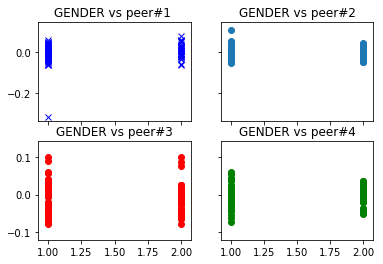

F_onewayResult(statistic=799.87089608418876, pvalue=8.0800697262879828e-72)
F_onewayResult(statistic=810.19435042929683, pvalue=2.8891291288176368e-72)
F_onewayResult(statistic=803.65451625885305, pvalue=5.5358133994923678e-72)
F_onewayResult(statistic=803.9597946952307, pvalue=5.3697914978204541e-72)
F_onewayResult(statistic=790.8893244446167, pvalue=1.9942496366050074e-71)
F_onewayResult(statistic=802.02346505386924, pvalue=6.5148358819423446e-72)
F_onewayResult(statistic=802.69742681442017, pvalue=6.0906924736653097e-72)
F_onewayResult(statistic=804.33080028303311, pvalue=5.1747772656162257e-72)
F_onewayResult(statistic=799.76750724084422, pvalue=8.1641614919714865e-72)
F_onewayResult(statistic=799.80352062052373, pvalue=8.1347699947192371e-72)
F_onewayResult(statistic=802.61222754097753, pvalue=6.1427320757804778e-72)
F_onewayResult(statistic=804.79987902095968, pvalue=4.9384142430722286e-72)
F_onewayResult(statistic=804.30892077434851, pvalue=5.1860768871353358e-72)
F_onewayResult

In [8]:
#Plot for Gender
X=X=Isctime['GENDER']
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(X, peerfactors['V2'],'bx')
ax1.set_title('GENDER vs peer#1 ')
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('GENDER vs peer#2')
ax3.scatter(X, peerfactors['V4'] , color='r')
ax3.set_title('GENDER vs peer#3')
ax4.scatter(X, peerfactors['V5'], color='g')
ax4.set_title('GENDER vs peer#4')
plt.show()
print(ss.f_oneway(peerfactors['V2'].values,X.values))    #Categorical 
print(ss.f_oneway(peerfactors['V3'].values,X.values))    #Using ANOVA
print(ss.f_oneway(peerfactors['V4'].values,X.values))
print(ss.f_oneway(peerfactors['V5'].values,X.values))
print(ss.f_oneway(peerfactors['V6'].values,X.values))
print(ss.f_oneway(peerfactors['V7'].values,X.values))
print(ss.f_oneway(peerfactors['V8'].values,X.values))
print(ss.f_oneway(peerfactors['V9'].values,X.values))
print(ss.f_oneway(peerfactors['V10'].values,X.values))
print(ss.f_oneway(peerfactors['V11'].values,X.values))
print(ss.f_oneway(peerfactors['V12'].values,X.values))
print(ss.f_oneway(peerfactors['V13'].values,X.values))
print(ss.f_oneway(peerfactors['V14'].values,X.values))
print(ss.f_oneway(peerfactors['V15'].values,X.values))

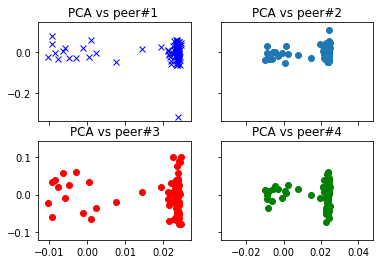

In [7]:
#Plot for PCA2
X=pca_cov[2]
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(X, peerfactors['V2'],'bx')
ax1.set_title('PCA vs peer#1 ')
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('PCA vs peer#2')
ax3.scatter(X, peerfactors['V4'] , color='r')
ax3.set_title('PCA vs peer#3')
ax4.scatter(X, peerfactors['V5'], color='g')
ax4.set_title('PCA vs peer#4')
plt.show()

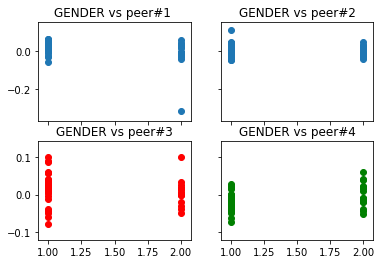

In [8]:
#Plot for Gender
X=pheno['GENDER'].apply(pd.to_numeric, args=('coerce',))
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.scatter(X, peerfactors['V2'])
ax1.set_title('GENDER vs peer#1 ')
ax2.scatter(X, peerfactors['V3'])
ax2.set_title('GENDER vs peer#2')
ax3.scatter(X, peerfactors['V4'] , color='r')
ax3.set_title('GENDER vs peer#3')
ax4.scatter(X, peerfactors['V5'], color='g')
ax4.set_title('GENDER vs peer#4')
plt.show()

In [ ]:
/storage/resources/datasets/gtex/53844/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/PhenotypeFiles/phs000424.v6.pht002742.v6.p1.c1.GTEx_Subject_Phenotypes.GRU.txt.gz